<a href="https://colab.research.google.com/github/OcelotHero/DynamicSystem/blob/main/Chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stochastic process

The following illustrates a stochastic process with a time varying mean and standard deviation for N-realizations of the underlying process. The mean, variance, and pdf are then estimated and contrasted against the true distribution


Text(0.5, 0, '$\\hat{p}(x)$')

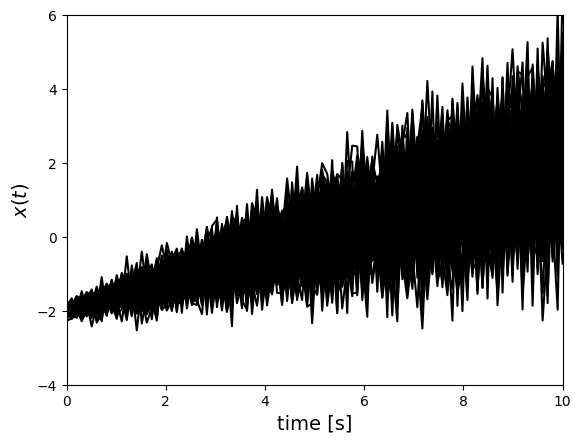

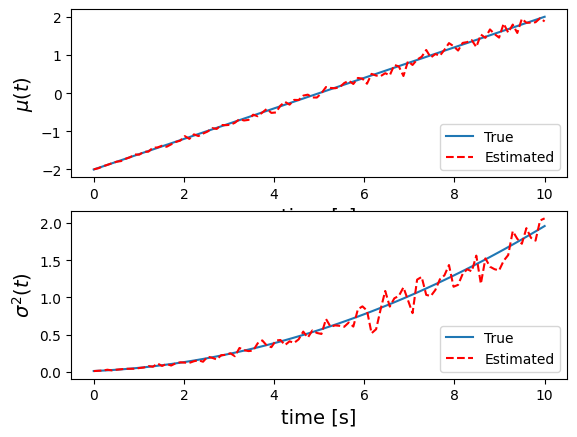

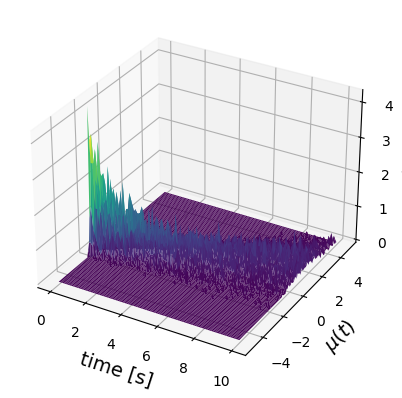

In [ ]:
import numpy as np
import numpy.random as rp
import matplotlib.pyplot as plt

# number of time sampling and number of stochastic process trial
N_sample = 100
N_realize = 100

# time
dt = 0.1
time_init = 0
time_final = dt*N_sample
time = np.linspace(time_init, time_final, N_sample)

# memory allocation
x_rand_all = np.zeros((N_realize, N_sample))

# time varying mean and standard deviation at all time instance
mu_all = np.linspace(-2, 2, N_sample)
sigma_all = np.linspace(0.1, 1.4, N_sample)

# generate random signal for each time instance with the corresponding mean and
# variance
for idx, (mu, sigma) in enumerate(zip(mu_all, sigma_all)):
  x_rand = mu + sigma*rp.randn(N_realize)
  x_rand_all[:, idx] = x_rand

# plot all realizations
fig, ax = plt.subplots(1, 1)
ax.plot(time, x_rand_all.T, 'k-')
ax.set_xlabel("time [s]", fontsize=14)
ax.set_ylabel(f"$x(t)$", fontsize=14)
ax.set(xlim=(0, time_final), ylim=(-4, 6))


# plot the estimated mean and variance of the realizations ate each instance and
# compare them with the true
mu_approx = np.mean(x_rand_all, axis=0)
sigma2_approx = np.var(x_rand_all, axis=0)

fig, ax = plt.subplots(2, 1)
ax[0].plot(time, mu_all, time, mu_approx, "r--")
ax[0].set_xlabel("time [s]", fontsize=14)
ax[0].set_ylabel(f"$\mu(t)$", fontsize=14)
ax[0].legend(["True", "Estimated"], loc="lower right")

ax[1].plot(time, sigma_all**2, time, sigma2_approx, "r--")
ax[1].set_xlabel("time [s]", fontsize=14)
ax[1].set_ylabel(f"$\sigma^2(t)$", fontsize=14)
ax[1].legend(["True", "Estimated"], loc="lower right")


# estimate the pdf for each instance, using N-realizations at each instance
N_bin = 100
x_bin = np.linspace(-5, 5, N_bin)

dx = np.mean(np.diff(x_bin))
px_all = np.zeros((N_bin-1, N_sample))
for idx, x_rand in enumerate(x_rand_all.T):
  N_occur = np.histogram(x_rand, x_bin)
  px_at_t = N_occur[0] / (dx*N_realize)
  px_all[:, idx] = px_at_t

# plot the estimated pdf
fig = plt.figure()
ax = plt.axes(projection="3d")
X, Y = np.meshgrid(time, x_bin[:-1] + 0.5*dx)
ax.plot_surface(X, Y, px_all, rstride=1, cstride=1, cmap="viridis")
ax.set_xlabel("time [s]", fontsize=14)
ax.set_ylabel(f"$\mu(t)$", fontsize=14)
ax.set_zlabel(f"$\hat{{p}}(x)$", fontsize=14)

# Gyroscope simulation

The following simulates a gyroscope measurement as a stochastic process with added white noise and bias noise

[(0.0, 120.0), (-4.0, 6.0)]

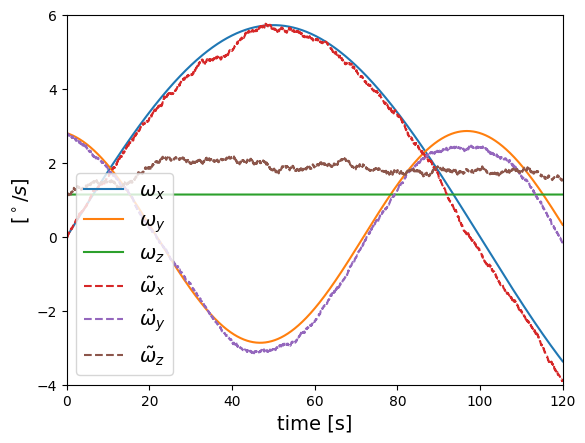

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# simulation time parameters
dt = 0.05 # [s]
time_init = 0 # [s]
time_final = 120 # [s]
N_sample = int((time_final-time_init) / dt) + 1
time = np.linspace(time_init, time_final, N_sample)

# standard deviation of the bias, sigma_beta_xyz
sigma_beta_xyz = np.array([0.05, 0.04, 0.06]) # [deg/s]
sigma_beta_xyz = sigma_beta_xyz*np.pi/180 # [rad/s]
sigma_eta_xyz = sigma_beta_xyz/np.sqrt(dt)

# standard deviation of the white noise. sigma_v
sigma_v = 0.01 # [deg/s]
sigma_v = sigma_v*np.pi/180 # [rad/s]

# initial beta(t)
beta = (2*np.random.rand(3) - 1) * 0.05 # [deg/s]
beta = beta*np.pi/180 # [rad/s]

# pre-allocation
w_all = np.zeros((N_sample, 3))
w_measure_all = np.zeros((N_sample, 3))

# simulation loop
for idx in range(N_sample):
  time_c = time[idx]
  w_true = np.array([0.1*np.sin(2*np.pi*0.005*time_c), # [rad/s]
                     0.05*np.cos(2*np.pi*0.01*time_c + 0.2), # [rad/s]
                     0.02 # [rad/s]
                     ])

  # beta(t)
  eta_u = sigma_eta_xyz*np.random.randn(3)
  dbeta = eta_u*dt
  beta = beta + dbeta

  # eta_v(t)
  eta_v = sigma_v*np.random.randn(3)

  # w_tilde
  w_measurement = w_true + beta + eta_v

  # store trajectories
  w_all[idx, :] = w_true
  w_measure_all[idx, :] = w_measurement

# plot all realization of beta in deg/s
ax = plt.subplot(111)
ax.plot(time, w_all*180/np.pi)
ax.plot(time, w_measure_all*180/np.pi, "--")

ax.set_xlabel(f"time [s]", fontsize=14)
ax.set_ylabel(f"$[^\circ/s]$", fontsize=14)
ax.legend([f"$\omega_x$", f"$\omega_y$", f"$\omega_z$", r"$\tilde{\omega}_x$",
           r"$\tilde{\omega}_y$", r"$\tilde{\omega}_z$"],
              fontsize=14, loc="lower left")
ax.set(xlim=(0, time_final), ylim=(-4, 6))

#Exercises
The following are selected answers to the exercises for Python

##Exercise 2.4
Bias noise simulation of N-realizations on each of the object's principal axes

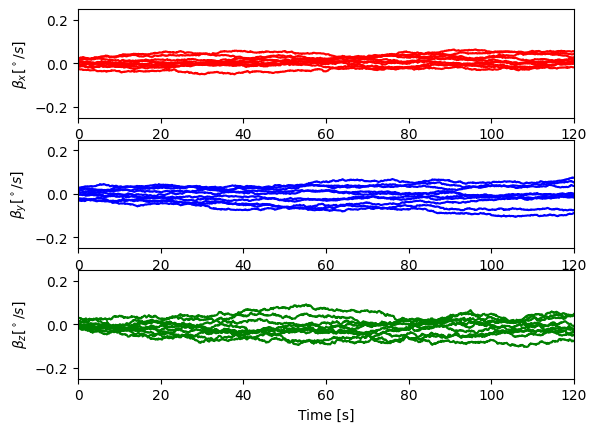

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# simulation time paramaters
dt = 0.1 # [s]
time_init = 0 # [s]
time_final = 120 # [s]
N_sample = int((time_final - time_init) / dt) + 1
time = np.linspace(time_init, time_final, N_sample)

# number of realizations
N_realizations = 10

# standard deviation of the bias, sigma_beta_xyz
sigma_beta_xyz = np.array([0.01, 0.01, 0.02]) # [deg/s]
sigma_beta_xyz = sigma_beta_xyz*np.pi/180 # [rad/s]

# initial beta(t)
beta = (2*np.random.rand(N_realizations, 3) - 1) * 0.03 # [deg/s]
beta = beta*np.pi/180 # [rad/s]

# pre-allocation and initial value
beta_all = np.zeros((N_sample, N_realizations, 3))
beta_all[0, :] = beta

# simulation loop
for idx in range(1, N_sample):
  eta_u = sigma_beta_xyz * np.random.randn(N_realizations, 3)
  dbeta = eta_u*dt
  beta_all[idx, :] = beta_all[idx - 1, :] + dbeta

# plot the result
fig, ax = plt.subplots(3, 1)
color = ['r', 'b', 'g']
axis = ['x', 'y', 'z']
for idx in range(3):
  ax[idx].plot(time, beta_all[:, :, idx]*180/np.pi, color[idx])
  ax[idx].set_xlabel("Time [s]")
  ax[idx].set_ylabel(fr"$\beta_{axis[idx]} [^\circ/s]$")
  ax[idx].set(xlim=[time_init, time_final], ylim=[-0.25, 0.25])


## Exercise 2.6

Conversion to and from direction cosine matrix and quaternion



In [ ]:
import numpy as np
from typing import Tuple

def qt2dcs(quat: Tuple[float, float, float, float]) -> np.ndarray:
  q13 = np.reshape(quat[:3], (3, 1))
  q4 = quat[3]
  q13x = np.array([[        0, -q13[2,0],  q13[1,0]],
                   [ q13[2,0],         0, -q13[0,0]],
                   [-q13[1,0],  q13[0,0],        0]])
  C_BR = (q4**2 - q13.T@q13) * np.eye(3) + 2*q13@q13.T - 2*q4*q13x
  return C_BR

def dcs2qt(C_BR: np.ndarray) -> Tuple[float, float, float, float]:
  a1 = (1+C_BR[0,0]-C_BR[1,1]-C_BR[2,2]) / 4
  a2 = (1+C_BR[1,1]-C_BR[2,2]-C_BR[0,0]) / 4
  a3 = (1+C_BR[2,2]-C_BR[0,0]-C_BR[1,1]) / 4
  a4 = (1+C_BR[0,0]+C_BR[1,1]+C_BR[2,2]) / 4

  i = np.argmax([a1, a2, a3, a4])
  match i:
    case 0:
      q1 = np.sqrt(a1)
      q2 = (C_BR[0,1]+C_BR[1,0]) / (4*q1)
      q3 = (C_BR[0,2]+C_BR[2,0]) / (4*q1)
      q4 = (C_BR[1,2]-C_BR[2,1]) / (4*q1)
    case 1:
      q2 = np.sqrt(a2)
      q1 = (C_BR[0,1]+C_BR[1,0]) / (4*q2)
      q3 = (C_BR[1,2]+C_BR[2,1]) / (4*q2)
      q4 = (C_BR[2,0]-C_BR[0,2]) / (4*q2)
    case 2:
      q3 = np.sqrt(a3)
      q1 = (C_BR[0,2]+C_BR[2,0]) / (4*q3)
      q2 = (C_BR[1,2]+C_BR[2,1]) / (4*q3)
      q4 = (C_BR[0,1]-C_BR[1,0]) / (4*q3)
    case 3:
      q4 = np.sqrt(a4)
      q1 = (C_BR[1,2]-C_BR[2,1]) / (4*q4)
      q2 = (C_BR[2,0]-C_BR[0,2]) / (4*q4)
      q3 = (C_BR[0,1]-C_BR[1,0]) / (4*q4)

  if q4 < 0:
    q1 = -q1
    q2 = -q2
    q3 = -q3
    q4 = -q4

  return (q1, q2, q3, q4)

## Exercise 2.7

In [ ]:
from scipy.sparse import block_diag
from scipy.linalg import solve

def dcs(r_R: np.ndarray, r_B: np.ndarray) -> np.ndarray:
  if r_R.shape[0] != r_B.shape[0]:
    return None

  A = np.zeros((3*r_R.shape[0], 9))
  for i in range(r_R.shape[0]):
    A[3*i:3*(i+1), :] = block_diag(([r_R[i].T], [r_R[i].T], [r_R[i].T])).toarray()

  vec_CT = solve(A.T@A, A.T@r_B.flatten().T)
  C_BR_Cal = vec_CT.reshape(3, 3)
  return C_BR_Cal

C_BR_Cal = dcs(np.array([[-0.6794, -0.3237, -0.6586],
                         [-0.7296,  0.5858,  0.3528],
                         [-0.2718,  0.6690, -0.6918],
                         [-0.2062, -0.3986,  0.8936],
                         [ 0.6858, -0.7274, -0.0238]]),
                np.array([[-0.2147, -0.7985,  0.5626],
                          [-0.7658,  0.4424,  0.4667],
                          [-0.8575, -0.4610, -0.2284],
                          [ 0.4442,  0.6863,  0.5758],
                          [ 0.9407, -0.1845, -0.2847]]))

print(C_BR_Cal)
print(dcs2qt(C_BR_Cal))

[[ 0.48856917 -0.84029019  0.23499365]
 [ 0.10967285  0.32634095  0.93888739]
 [-0.86562651 -0.43294893  0.25152574]]
(0.47715703962129524, -0.3828216622862974, -0.3304195602255873, 0.7187551501122271)


## Exercise 2.8

In [ ]:
import numpy as np
from scipy.linalg import solve

def quest(r_R: np.ndarray, r_B: np.ndarray) -> np.ndarray:
  if r_R.shape[0] != r_B.shape[0]:
    return None

  B = np.zeros((3,3))
  for i in range(r_R.shape[0]):
    B += r_B[i].reshape(3,1)@r_R[i].reshape(1,3)

  S = B + B.T
  sigma = np.trace(B)
  delta = np.linalg.det(S)
  kappa = (S[1,1]*S[2,2]-S[1,2]**2) + (S[0,0]*S[2,2]-S[0,2]**2) \
            + (S[0,0]*S[1,1]-S[0,1]**2)

  z = np.zeros((3,))
  for i in range(r_R.shape[0]):
    z += np.cross(r_B[i], r_R[i])

  a = sigma**2 - kappa
  b = sigma**2 + z@z.T
  c = delta + z@S@z.T
  d = z@S@S@z.T
  f = lambda x : x**4 - (a+b)*x**2 - c*x + (a*b + c*sigma - d)

  x_star = 10
  eps = 10e-6
  delta_x = 1000

  while delta_x > eps:
    df_dx = 4*x_star**3 - 2*(a+b)*x_star - c
    x_new = x_star - f(x_star)/df_dx
    delta_x = np.abs(x_new - x_star)
    x_star = x_new
  y_star = solve((sigma+x_star)*np.eye(3) - S, z)
  q_star = 1/np.sqrt(1+y_star@y_star.T)*np.hstack((y_star, 1))
  return q_star

q = quest(np.array([[-0.6794, -0.3237, -0.6586],
                         [-0.7296,  0.5858,  0.3528],
                         [-0.2718,  0.6690, -0.6918],
                         [-0.2062, -0.3986,  0.8936],
                         [ 0.6858, -0.7274, -0.0238]]),
                np.array([[-0.2147, -0.7985,  0.5626],
                          [-0.7658,  0.4424,  0.4667],
                          [-0.8575, -0.4610, -0.2284],
                          [ 0.4442,  0.6863,  0.5758],
                          [ 0.9407, -0.1845, -0.2847]]))
dcs = qt2dcs(q)
print(q)
print(dcs)

[ 0.47715344 -0.38281969 -0.33040859  0.71875159]
[[ 0.48855849 -0.84029086  0.23499334]
 [ 0.10963593  0.32630952  0.93888341]
 [-0.86561571 -0.43293575  0.25154736]]


## Exercise 2.10

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp

m_mass = 1.0 # [kg]
k_spring = 0.5 # [N/m]
c_damper = 0.1 # [N/(m/s)]
msd_const = [m_mass, k_spring, c_damper]

init_pos = 0.0 # [m]
init_vel = 0.0 # [m/s]

init_time = 0 # [s]
final_time = 60 # [s]

Delta_t = 0.01 # [s]

time_interval = [init_time, final_time]

num_w = int((final_time-init_time) / Delta_t) + 1
sigma_beta = np.sqrt(0.5)
sigma_w = sigma_beta/np.sqrt(Delta_t)
wk_noise = sigma_w*np.random.randn(num_W)

x0 = [init_pos, init_vel]
t0 = time_init
tf = t0 + Delta_t

tout_all = np.zeros(num_w)
xout_all = np.zeros((num_w, 2))

tout_all[0] = t0
xout_all[0] = x0

def msd_noisy(time, state, wk, msd_const):
  x1, x2 = state
  m, k, c = msd_const

  dxdt = [x2, -(k/m)*x1 - (c/m)*x2 + wk]
  return dxdt

for i in range(1, num_w):
  wk = w